In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False


import urllib.request as req
from urllib.request import urlopen
from urllib.error import HTTPError,URLError
import urllib.parse
from bs4 import BeautifulSoup
import requests

from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['figure.figsize'] = (7, 7)
plt.style.use('ggplot')
from patsy import dmatrix, dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [130]:
result_corona = pd.read_csv("data/result_checkpoint.csv", thousands = ",", index_col = 0)
result_corona


result_corona.index_names = ["분기"]

In [131]:
result_corona

,3사 Mobile 매출,3사 PC매출,평균기온(°C),마케팅 비용,게임시장 규모
1Q2017,1.907603e+11,9.447470e+11,2.744561,1.858444e+11,2.049056e+12
2Q2017,5.611863e+11,7.456180e+11,17.886667,2.045050e+11,1.458523e+12
3Q2017,9.005560e+11,9.349635e+11,24.000000,2.372769e+11,2.051440e+12
4Q2017,8.958130e+11,7.834570e+11,7.394386,2.862413e+11,1.836915e+12
1Q2018,7.269950e+11,7.692030e+11,2.030175,2.416348e+11,2.473959e+12
2Q2018,5.324043e+11,7.308540e+11,17.555088,2.368410e+11,1.727453e+12
3Q2018,5.921097e+11,1.092198e+12,24.640351,2.473202e+11,1.923482e+12
4Q2018,5.627087e+11,7.497090e+11,7.538947,2.762086e+11,1.899634e+12
1Q2019,3.239240e+11,9.549040e+11,3.451228,2.448007e+11,2.228777e+12
2Q2019,3.402707e+11,8.318520e+11,17.073776,2.597875e+11,1.858589e+12


In [132]:
##### 기온 데이터 제외

df = result_corona.loc[:, ("3사 Mobile 매출", "3사 PC매출", "마케팅 비용", "게임시장 규모")]

In [133]:
print("변수들의 평균: \n", df.mean())
print("-----------------------------------------------------")
print("변수들의 분산: \n", df.var())        # 분산에 마케팅비용 이상치 -> 표준화 필요

변수들의 평균: 
 3사 Mobile 매출    7.158151e+11
3사 PC매출         1.089105e+12
마케팅 비용          2.770832e+11
게임시장 규모         2.118201e+12
dtype: float64
-----------------------------------------------------
변수들의 분산: 
 3사 Mobile 매출    1.030064e+23
3사 PC매출         1.067269e+23
마케팅 비용          4.000171e+21
게임시장 규모         1.006792e+23
dtype: float64


In [134]:
print("변수들의 최솟값: \n", df.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df.max())

변수들의 최솟값: 
 3사 Mobile 매출    1.907603e+11
3사 PC매출         7.308540e+11
마케팅 비용          1.858444e+11
게임시장 규모         1.458523e+12
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 3사 Mobile 매출    1.356090e+12
3사 PC매출         1.815808e+12
마케팅 비용          4.316472e+11
게임시장 규모         2.669047e+12
dtype: float64


### 정규화

In [135]:
from sklearn.preprocessing import MinMaxScaler         

scaler = MinMaxScaler()
scaler.fit(df)
result_scaled = scaler.transform(df)

df_normed = pd.DataFrame(data = result_scaled, columns = df.columns)

print("변수들의 최솟값: \n", df_normed.min())
print("-----------------------------------------------------")
print("변수들의 최댓값: \n", df_normed.max())

# 최솟값과 최댓값의 격차가 줄어들었다.

변수들의 최솟값: 
 3사 Mobile 매출    0.0
3사 PC매출         0.0
마케팅 비용          0.0
게임시장 규모         0.0
dtype: float64
-----------------------------------------------------
변수들의 최댓값: 
 3사 Mobile 매출    1.0
3사 PC매출         1.0
마케팅 비용          1.0
게임시장 규모         1.0
dtype: float64


In [136]:
df_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
0,0.000000,0.197145,0.000000,0.487832
1,0.317872,0.013608,0.075917,0.000000
2,0.609094,0.188127,0.209243,0.489802
3,0.605024,0.048484,0.408445,0.312585
4,0.460157,0.035346,0.226972,0.838839
5,0.293174,0.000000,0.207470,0.222160
6,0.344408,0.333050,0.250102,0.384097
7,0.319179,0.017379,0.367629,0.364396
8,0.114271,0.206506,0.239852,0.636297
9,0.128299,0.093090,0.300823,0.330489


In [137]:
df_normed.index=['1Q2017','2Q2017','3Q2017','4Q2017','1Q2018','2Q2018','3Q2018','4Q2018','1Q2019','2Q2019','3Q2019','4Q2019','1Q2020','2Q2020','3Q2020','4Q2020','1Q2021','2Q2021','3Q2021']


In [138]:
df_normed

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


In [139]:
df_normed2 =df_normed.drop([df_normed.index[12],df_normed.index[13],df_normed.index[14],df_normed.index[15],df_normed.index[16],df_normed.index[17],df_normed.index[18]])

In [140]:
df_normed2

,3사 Mobile 매출,3사 PC매출,마케팅 비용,게임시장 규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


In [141]:
# 코로나 이전 pc 매출액 관련



print(np.corrcoef(df_normed2["3사 PC매출"],df_normed2["3사 Mobile 매출"])) 
print(np.corrcoef(df_normed2["3사 PC매출"],df_normed2["마케팅 비용"])) 
print(np.corrcoef(df_normed2["3사 PC매출"],df_normed2["게임시장 규모"])) 



[[ 1.         -0.34489121]
 [-0.34489121  1.        ]]
[[ 1.         -0.14686034]
 [-0.14686034  1.        ]]
[[1.         0.21287507]
 [0.21287507 1.        ]]


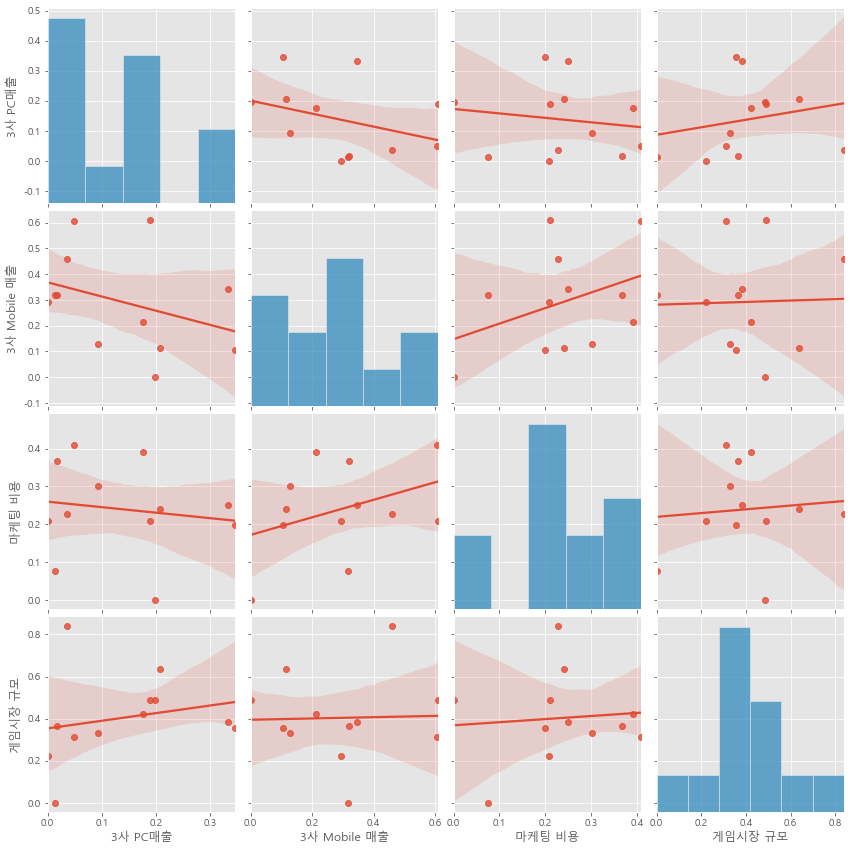

In [142]:
sns.pairplot(df_normed2, vars=["3사 PC매출","3사 Mobile 매출","마케팅 비용","게임시장 규모"],size=3,kind="reg")

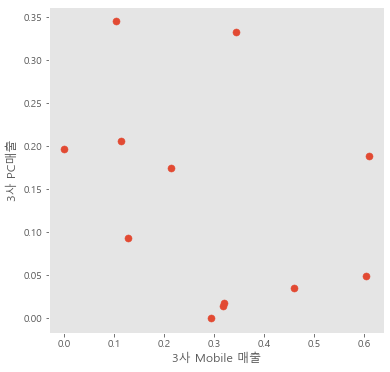

In [143]:
##### 3사 PC매출과 3사 Mobile 매출이 서로 관계가 있는지 산포도 확인

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["3사 Mobile 매출"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기
plt.xlabel("3사 Mobile 매출")
plt.ylabel("3사 PC매출")
plt.grid()

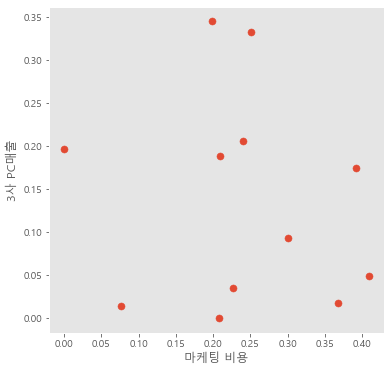

In [144]:
##### 3사 PC매출과 마케팅 비용이 서로 관계가 있는지 산포도 확인


plt.figure(figsize=(6,6))
plt.scatter(df_normed2["마케팅 비용"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기
plt.xlabel("마케팅 비용")
plt.ylabel("3사 PC매출")
plt.grid()

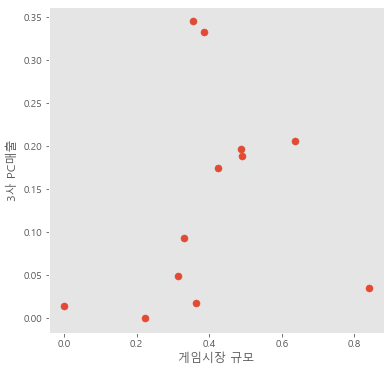

In [145]:
##### 3사 PC매출과 게임시장 규모가 서로 관계가 있는지 산포도 확인


plt.figure(figsize=(6,6))
plt.scatter(df_normed2["게임시장 규모"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기
plt.xlabel("게임시장 규모")
plt.ylabel("3사 PC매출")
plt.grid()

# 3사 Mobile 매출과 3사 pc 매출 그래프

+ 결과: 3사 PC매출은 Moblie매출 음의 상관관계


[-0.21567767  0.20082265]
 
-0.2157 x + 0.2008


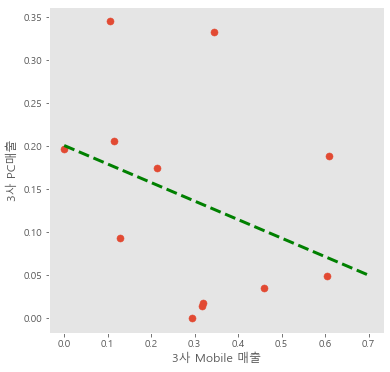

In [146]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["3사 Mobile 매출"],df_normed2["3사 PC매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,0.7) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["3사 Mobile 매출"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("3사 Mobile 매출")
plt.ylabel("3사 PC매출")
plt.grid()



# 마케팅 비용과 3사 PC매출 그래프

+ 결과: 3사 PC매출은 마게팅비용과 음의 상관관계


[-0.14816885  0.17327582]
 
-0.1482 x + 0.1733


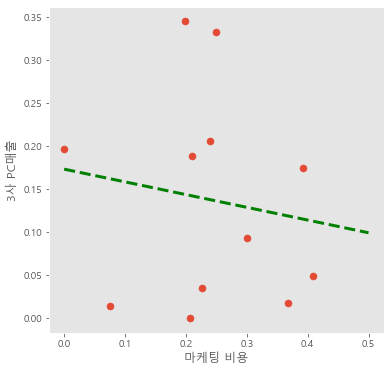

In [147]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["마케팅 비용"],df_normed2["3사 PC매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,0.5) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["마케팅 비용"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("마케팅 비용")
plt.ylabel("3사 PC매출")
plt.grid()



# 게임시장 규모와 3사 PC매출 그래프

+ 결과: 3사 PC매출은 3사 PC매출과 양의 상관관계



[0.12496629 0.08729542]
 
0.125 x + 0.0873


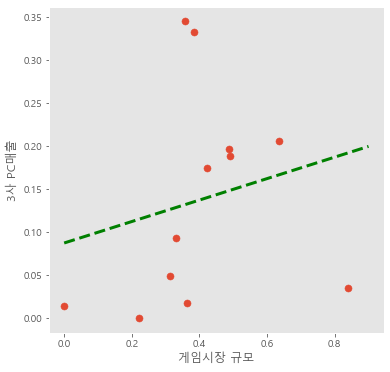

In [148]:
# 기울기와 절편

fp1= np.polyfit(df_normed2["게임시장 규모"],df_normed2["3사 PC매출"],1)
print(fp1)


#방정식
f1 = np.poly1d(fp1)
print(f1)



fx= np.linspace(0,0.9) 

plt.figure(figsize=(6,6))
plt.scatter(df_normed2["게임시장 규모"],df_normed2["3사 PC매출"] ,s=50) # s는 점크기

plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")
plt.xlabel("게임시장 규모")
plt.ylabel("3사 PC매출")
plt.grid()


In [149]:
df_normed2["오차1"] = np.abs(df_normed2["3사 Mobile 매출"]- f1(df_normed2["3사 PC매출"]))

df_normed2["오차2"] = np.abs(df_normed2["마케팅 비용"]- f1(df_normed2["3사 PC매출"]))

df_normed2["오차3"] = np.abs(df_normed2["게임시장 규모"]- f1(df_normed2["3사 PC매출"]))



#df_normed2["오차1"] = np.abs(df_normed2["3사 PC매출"]- f1(df_normed2["3사 Mobile 매출"]))

#df_normed2["오차2"] = np.abs(df_normed2["3사 PC매출"]- f1(df_normed2["마케팅 비용"]))

#df_normed2["오차3"] = np.abs(df_normed2["3사 PC매출"]- f1(df_normed2["게임시장 규모"]))

In [150]:
df_normed3 = df_normed2.sort_values(by="오차1",ascending=False)
df_normed4 = df_normed2.sort_values(by="오차2",ascending=False)
df_normed5 = df_normed2.sort_values(by="오차3",ascending=False)


# PC게임 매출과 Mobile게임 매출의 경향

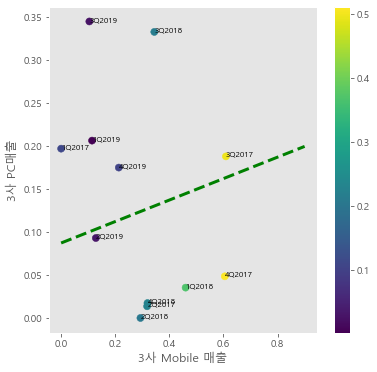

In [151]:
plt.figure(figsize=(6,6))
plt.scatter(df_normed2["3사 Mobile 매출"],df_normed2["3사 PC매출"] ,s=50 ,c=df_normed2["오차1"]) # s는 점크기
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("3사 Mobile 매출")
plt.ylabel("3사 PC매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed3["3사 Mobile 매출"][n],df_normed3["3사 PC매출"][n],df_normed3.index[n],fontsize=8)

## 마케팅 비용 PC게임 매출의 경향

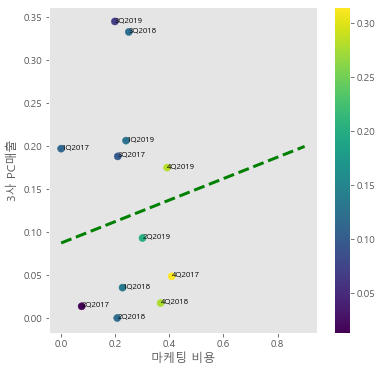

In [152]:
plt.figure(figsize=(6,6))
plt.scatter(df_normed2["마케팅 비용"],df_normed2["3사 PC매출"] ,s=50 ,c=df_normed2["오차2"]) # s는 점크기
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("마케팅 비용")
plt.ylabel("3사 PC매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed4["마케팅 비용"][n],df_normed4["3사 PC매출"][n],df_normed4.index[n],fontsize=8)
    

## PC게임 매출 시장규모 경향

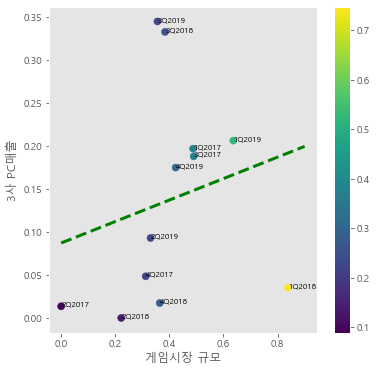

In [153]:
plt.figure(figsize=(6,6))
plt.scatter(df_normed2["게임시장 규모"],df_normed2["3사 PC매출"] ,s=50 ,c=df_normed2["오차3"]) # s는 점크기
plt.plot(fx,f1(fx),lw=3,color="g",ls="dashed")

plt.xlabel("게임시장 규모")
plt.ylabel("3사 PC매출")
plt.grid()
plt.colorbar()

for n in range(12):
    plt.text(df_normed5["게임시장 규모"][n],df_normed5["3사 PC매출"][n],df_normed5.index[n],fontsize=8)

Text(0.5, 1.0, 'heat map')

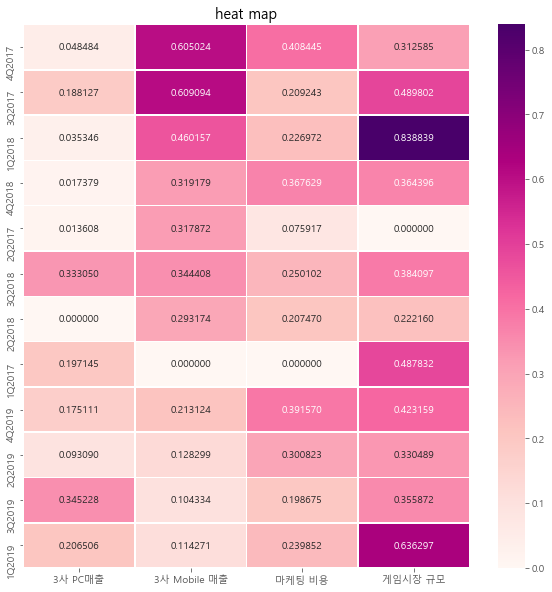

In [154]:
plt.figure(figsize=(10,10))
sns.heatmap(df_normed3[["3사 PC매출","3사 Mobile 매출","마케팅 비용","게임시장 규모"]],cmap="RdPu",annot=True,fmt="f",linewidths=.5)


plt.title("heat map")

In [155]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [156]:
df_normed2 = df_normed[0:12]
df_normed2.columns = ["삼사Mobile매출","삼사PC매출","마케팅비용","게임시장규모"]
df_normed2

,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모
1Q2017,0.000000,0.197145,0.000000,0.487832
2Q2017,0.317872,0.013608,0.075917,0.000000
3Q2017,0.609094,0.188127,0.209243,0.489802
4Q2017,0.605024,0.048484,0.408445,0.312585
1Q2018,0.460157,0.035346,0.226972,0.838839
2Q2018,0.293174,0.000000,0.207470,0.222160
3Q2018,0.344408,0.333050,0.250102,0.384097
4Q2018,0.319179,0.017379,0.367629,0.364396
1Q2019,0.114271,0.206506,0.239852,0.636297
2Q2019,0.128299,0.093090,0.300823,0.330489


##  기술적 분석

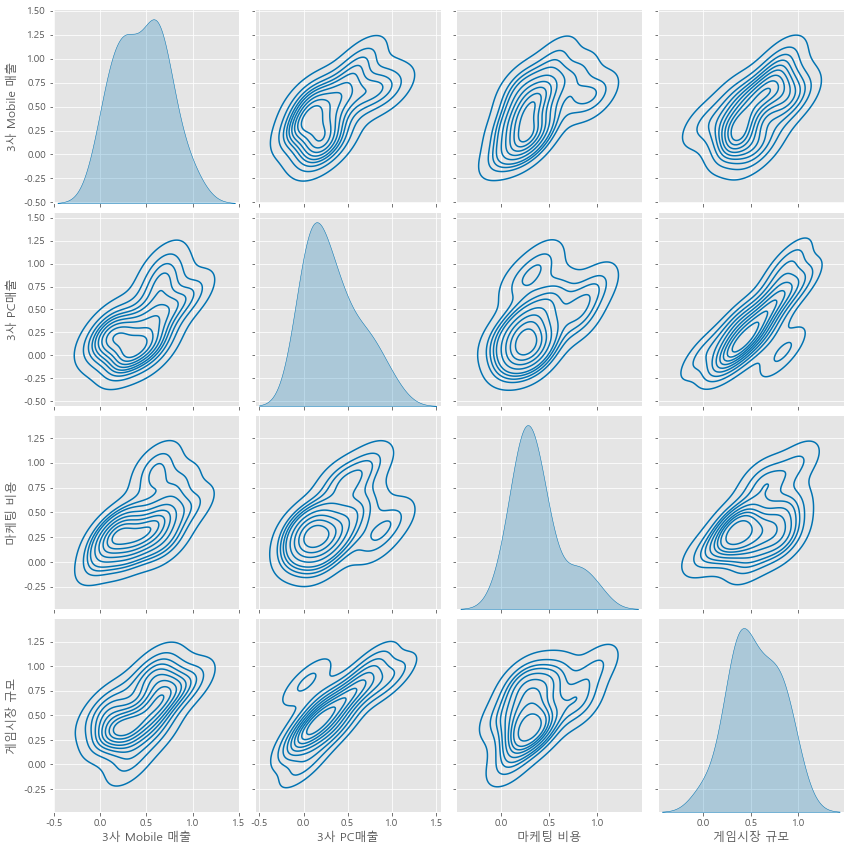

In [157]:
sns.set_palette('colorblind')
sns.pairplot(data=df_normed, height=3, kind="kde")            
# 산점도를 통해 변수간 관계 확인

<AxesSubplot:title={'center':'Heat Map'}>

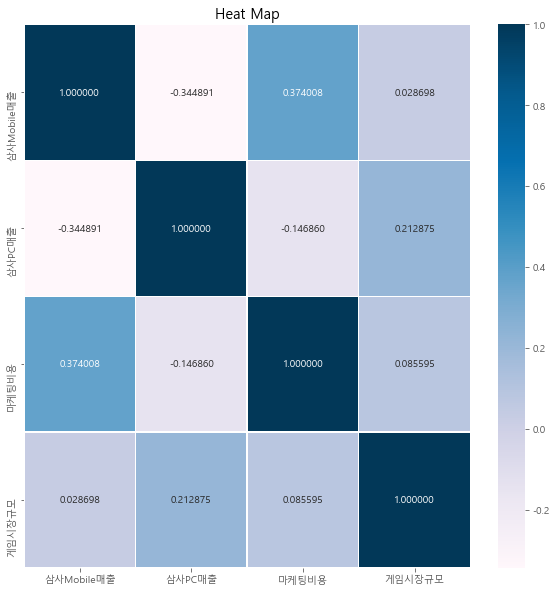

In [158]:
plt.figure(figsize=(10,10))
plt.title("Heat Map")
sns.heatmap(df_normed2.astype(float).corr(), linewidth=0.5, cmap="PuBu", annot=True, fmt="f")

##  회귀모델 구축

In [159]:
X = df_normed2[['삼사Mobile매출', '마케팅비용','게임시장규모']]
y = df_normed2['삼사PC매출']


regr = linear_model.LinearRegression()
model = regr.fit(X, y)

print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.1554556130158146
Coefficients: [-0.21027416 -0.04080355  0.1326632 ]


###### 삼사PC매출 = 0.15545561 - -0.21027416*삼사Mobile매출 + -0.04080355*마케팅비용  0.1326632*게임시장규모

## 모델 검증

In [160]:
X = df_normed2[['삼사Mobile매출', '마케팅비용', '게임시장규모']]
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(df_normed2['삼사PC매출'], X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                 삼사PC매출   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                 -0.141
Method:                 Least Squares   F-statistic:                    0.5462
Date:                Thu, 02 Dec 2021   Prob (F-statistic):              0.664
Time:                        16:32:20   Log-Likelihood:                 9.8953
No. Observations:                  12   AIC:                            -11.79
Df Residuals:                       8   BIC:                            -9.851
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1555      0.116      1.342      0.2


# 추정된 회귀식
#### 삼사 pc 매출 = 0.1555 + -0.2103삼사Mobile매출 + -0.0408 마케팅비용 0.1327*게임시장규모

# 선형성 검증

In [161]:
df_normed2['피씨_pred'] = olsmod.predict(X) # 예측값 추가 한 뒤 실제값과 비교하기
df_normed2['residual'] = olsmod.resid
df_normed2.head(12)

,삼사Mobile매출,삼사PC매출,마케팅비용,게임시장규모,피씨_pred,residual
1Q2017,0.000000,0.197145,0.000000,0.487832,0.220173,-0.023028
2Q2017,0.317872,0.013608,0.075917,0.000000,0.085518,-0.071910
3Q2017,0.609094,0.188127,0.209243,0.489802,0.083820,0.104308
4Q2017,0.605024,0.048484,0.408445,0.312585,0.053037,-0.004553
1Q2018,0.460157,0.035346,0.226972,0.838839,0.160718,-0.125372
2Q2018,0.293174,0.000000,0.207470,0.222160,0.114816,-0.114816
3Q2018,0.344408,0.333050,0.250102,0.384097,0.123786,0.209264
4Q2018,0.319179,0.017379,0.367629,0.364396,0.121682,-0.104303
1Q2019,0.114271,0.206506,0.239852,0.636297,0.206054,0.000453
2Q2019,0.128299,0.093090,0.300823,0.330489,0.160047,-0.066957


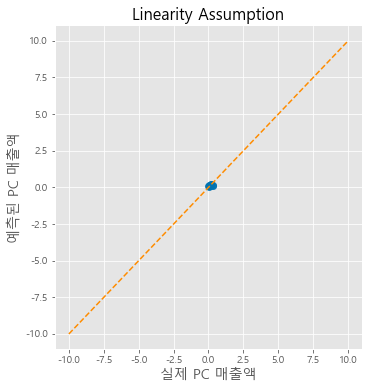

In [162]:
sns.lmplot(x='삼사PC매출', y='피씨_pred', data=df_normed2, fit_reg=False, size=5)
    
# Plotting the diagonal line
line_coords = np.arange(df_normed2[['삼사PC매출', '피씨_pred']].min().min()-10, 
                        df_normed2[['삼사PC매출', '피씨_pred']].max().max()+10)
plt.plot(line_coords, line_coords,  # X and y points
         color='darkorange', linestyle='--')

plt.ylabel('예측된 PC 매출액', fontsize=14)
plt.xlabel('실제 PC 매출액', fontsize=14)
plt.title('Linearity Assumption', fontsize=16)
plt.show()

# 정규성 검증

In [163]:
from scipy.stats import shapiro
from scipy.stats import norm
from scipy import stats
from statsmodels.formula.api import ols
## Shapiro-Wilks test
## 선형 모형 적합
fit = ols('삼사PC매출 ~ 삼사Mobile매출 + 마케팅비용 + 게임시장규모',data=df_normed2).fit()
 
## 이론상 잔차값 계산
sqrt_mse = np.sqrt(fit.mse_resid) ## square root of mse
std_res = fit.resid/sqrt_mse ## studentized residual
 
## Shapiro-Wilks 테스트의 검정통계량과 p-value를 계산한다.
shapiro_test = stats.shapiro(std_res)
 
sw_stat = shapiro_test[0] ## S-W 검정 통계량
p_value = shapiro_test[1] ## p_value

print("검정통계량:", sw_stat) # 검정통계량 값 1에 가까움
print("p값:", p_value) # 귀무가설 채택 즉, 정규성을 만족한다고 할 수 있음

검정통계량: 0.9060195684432983
p값: 0.1896514743566513


###### 검정통계량이 1에 가깝고 p값도 0.05보다  크기에 정규성을 만족

In [170]:
# 다중공선성 확인
df_normed2["intercept"] =  0.1555
lm = sm.OLS(df_normed2["삼사PC매출"],df_normed2[["intercept", "삼사PC매출", "마케팅비용", "게임시장규모"]])
results = lm.fit()
results.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x0000019EDBA13490>>

In [171]:
y, X = dmatrices('삼사PC매출 ~  삼사Mobile매출 + 마케팅비용 + 게임시장규모', df_normed2, return_type = 'dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns 
vif

# 삼사모바일 매출과 나머지 변수간의 다중공선성 확인하기. 
# vif가 10 이하로 다중공선성이 없다고봄. 상수항 제외하고도 vif 지수가 1점대로 저조하게 나옴.

,VIF Factor,features
0,9.535433,Intercept
1,1.162646,삼사Mobile매출
2,1.170263,마케팅비용
3,1.007393,게임시장규모


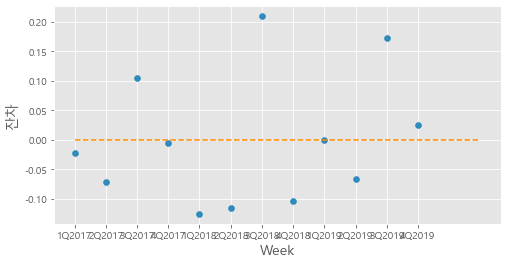

In [172]:
plt.subplots(figsize=(8, 4))
plt.scatter(x=df_normed2.index, y=df_normed2.residual, alpha=0.8)
plt.plot(np.repeat(0, len(df_normed2.index)+2), color='darkorange', linestyle='--')

plt.ylabel('잔차', fontsize=14)
plt.xlabel('Week', fontsize=14)
plt.show()  


###### 잔차가 모바일 대비 일정.... -> 등분산성 만족못하...?


## 결론
 - 회귀식 : 삼사PC매출 =  -0.2103삼사Mobile매출 + -0.0408 마케팅비용 0.1327*게임시장규모
 - 조정된 r2값이 17.0%로 추정된 회귀식으로 17.0%를 설명할 수 없다고 보여짐.
 - 정규성은 만족하지만 다른것들을 만족하지 못하는 것으로 보여지기에 위 모델로 3사 pc 매출액은 설명이 불가능하다고 보여짐...